# Linear regression From Scratch

In [1]:
# import libreies 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#read the dataset
dataset = pd.read_csv('Data/brain.csv')
dataset.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
# the relationship between Head size and Brain weights
#devide the dataset into dependent (output) and independent (input) values

In [5]:
dataset.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [6]:
X=dataset['Head Size(cm^3)'].values
Y=dataset['Brain Weight(grams)'].values

In [15]:
# mean of inputs and outputs
x_mean = np.mean(X)
y_mean = np.mean(Y)

# total number of values
n=len(X)

In [16]:
""" 

Linear regression equation: y = b1x + b0
b1 scale factor, b0 -bias

"""

' \n\nLinear regression equation: y = b1x + b0\nb1 scale factor, b0 -bias\n\n'

In [18]:
# Using the formula to calculate the b1 and b0
numerator = 0
denominator = 0
for i in range(n):
    numerator += (X[i]-x_mean)*(Y[i]-y_mean)
    denominator += (X[i]-x_mean)**2
    
b1 = numerator / denominator
b0 = y_mean - (b1 * x_mean)

#print the coeffient
print(b1,b0)

0.26342933948939945 325.57342104944223


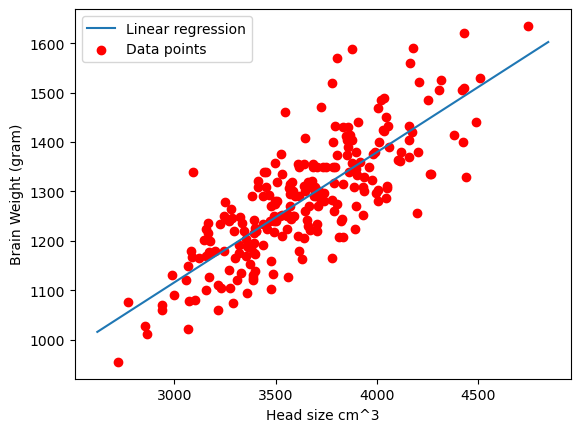

In [29]:
# plot the values
x_max = np.max(X) + 100
x_min = np.min(X) - 100

# calculate line values of x and y
x=np.linspace(x_min, x_max, 1000)
y=b0+b1*x

# plotting Line
plt.plot(x,y, label = 'Linear regression')

# plotting the data points
plt.scatter(X,Y, color = 'red', label = 'Data points')

#plotting the x and y Labels
plt.xlabel('Head size cm^3')
plt.ylabel('Brain Weight (gram)')
plt.legend()
plt.show()

In [30]:
# How good our model is?? the accurancy

In [34]:
rmse=0
for i in range(n):
    y_pred = b0+b1*X[i]
    rmse += (Y[i] - y_pred)**2
rmse = np.sqrt(rmse/n)
print(rmse)

72.1206213783709


In [39]:
# What about the R^2 to measure the accuracy of the Linear model
sumofsquares = 0
sumofresiduals = 0

for i in range(n):
    y_pred = b0 + b1 * X[i]
    sumofsquares += (Y[i] - y_mean) ** 2
    sumofresiduals += (Y[i] - y_pred) ** 2
    
score = 1 - (sumofresiduals / sumofsquares)
print(score)


0.6393117199570003


# Second - Linear regression with Skit-learn

In [43]:
X=dataset.iloc[:,2:3].values
Y=dataset.iloc[:,-1].values
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X,Y)

LinearRegression()

In [45]:
y_pred = regressor.predict(X)

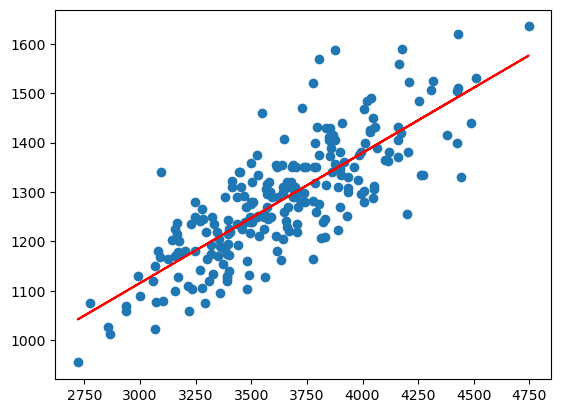

In [46]:
plt.scatter(X,Y)
plt.plot(X,y_pred, color='red')

In [47]:
#Model Evaluation
#print the intercept
print(regressor.intercept_)

325.5734210494426


In [48]:
print(regressor.coef_)

[0.26342934]


In [54]:
# the metrics
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y, y_pred))
print('MSE:', metrics.mean_squared_error(Y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y, y_pred)))

MAE: 56.36724079565057
MSE: 5201.3840280023305
RMSE: 72.1206213783709
